# PCA and Local Principal Curves

In [1]:
import sys
import os
# Get the current working directory (the directory where the notebook is located)
current_dir = os.getcwd()
# Get the path of the parent directory (one level up)
parent_dir = os.path.dirname(current_dir)
# Change the working directory to the parent directory
os.chdir(parent_dir)

import json
import pandas as pd
import numpy as np
from datetime import datetime
import re
import cv2
from tools.read_jsons import * # read_jsons.py
from tools.get_image_files import * # get_image_files.py
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Get & Process Shoreline Images

In [2]:
# station_name = 'oakisland_west'
station_name = 'jennette_north'
# station_name = 'currituck_hampton_inn'
getImg = GetImages(station_name)

In [3]:
getImg.get_image_dir() # get the image directory
getImg.set_image_type('timex') # set the image type
getImg.get_image_list()[:3] # get the image list
getImg.parse_image_datetime()[:3] # parse the image datetime
getImg.create_image_df() # create the image dataframe
getImg.image_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 708 entries, 2024-07-01 09:48:07 to 2024-07-31 23:31:40
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   708 non-null    object
dtypes: object(1)
memory usage: 11.1+ KB


In [4]:
dt_range = getImg.get_date_range('2024-07-14 00:00:00', '2024-07-15 00:00:00') # get the date range
getImg.get_image_range(dt_range).tail() # get the image range

,Image
Datetime,
2024-07-14 20:25:41,jennette_north-2024-07-14-202541Z-timex.jpeg
2024-07-14 21:09:05,jennette_north-2024-07-14-210905Z-timex.jpeg
2024-07-14 22:04:55,jennette_north-2024-07-14-220455Z-timex.jpeg
2024-07-14 22:48:18,jennette_north-2024-07-14-224818Z-timex.jpeg
2024-07-14 23:34:16,jennette_north-2024-07-14-233416Z-timex.jpeg


In [5]:
imgs = getImg.get_images() # get the images

In [6]:
getImg.norm_rmb_images(scale=False)

In [7]:
getImg.otsu_threshold()

otsu_norm type: <class 'dict'>


In [8]:
getImg.image_gradient()
getImg.gradient_mask(scale=False)

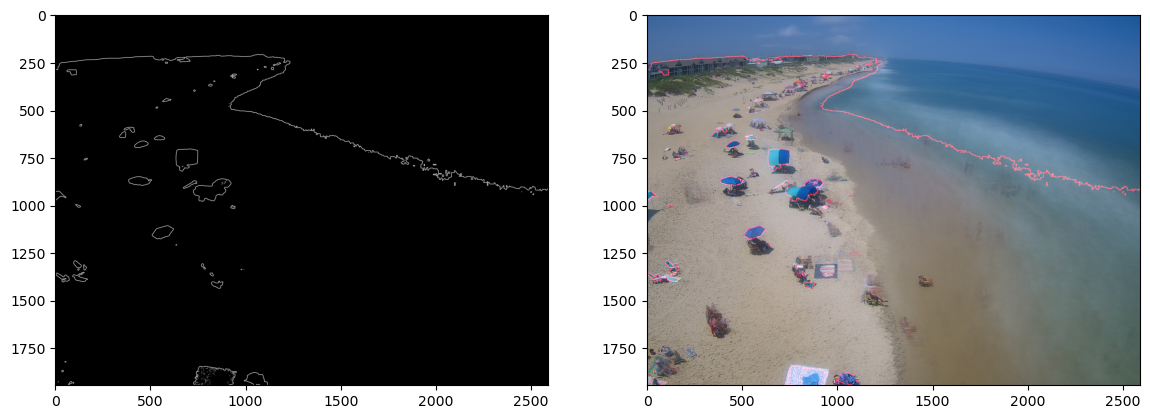

In [9]:
# plot first gradient image
masked_image = getImg.gradient_masks[dt_range[9]]
# Convert BGR to RGB for correct display
masked_rgb = cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 18))
ax[0].imshow(getImg.image_gradients[list(getImg.image_gradients.keys())[9]], cmap='gray')
ax[1].imshow(masked_rgb)
# Display the images
plt.show()

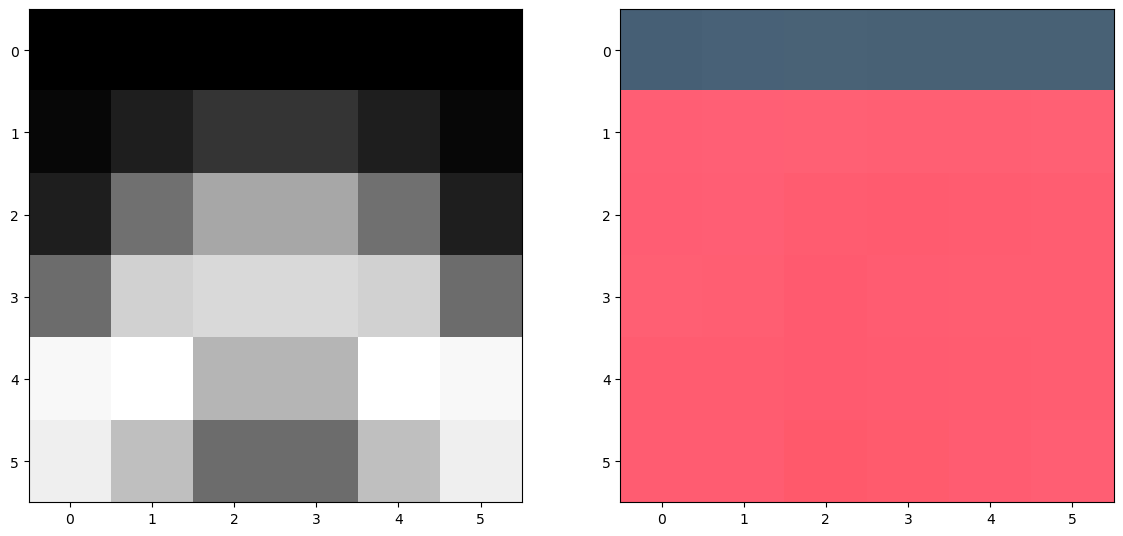

In [10]:
getImg.image_gradients[list(getImg.image_gradients.keys())[6]].shape
# zoom in on the image at coordinates (x, y) = (1000, 500) with a 10 pixel box and show the image
x = 1025
y = 480
box = 3
masked_image = getImg.gradient_masks[dt_range[6]]
masked_rgb = cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 18))
ax[0].imshow(getImg.image_gradients[list(getImg.image_gradients.keys())[6]][y-box:y+box, x-box:x+box], cmap='gray')
ax[1].imshow(masked_rgb[y-box:y+box, x-box:x+box])
plt.show()

In [11]:
getImg.image_gradients[list(getImg.image_gradients.keys())[6]][y-box:y+box, x-box:x+box]

array([[    0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ],
       [  360.62445841,  1486.89273319,  2600.49995193,  2600.49995193,
         1486.89273319,   360.62445841],
       [ 1486.89273319,  5409.36687608,  8063.80803343,  8063.80803343,
         5409.36687608,  1486.89273319],
       [ 5250.7713719 , 10123.21095305, 10501.54274381, 10501.54274381,
        10123.21095305,  5250.7713719 ],
       [12003.97434186, 12345.79280565,  8774.37177238,  8774.37177238,
        12345.79280565, 12003.97434186],
       [11545.61605113,  9243.5301698 ,  5250.7713719 ,  5250.7713719 ,
         9243.5301698 , 11545.61605113]])

## RGB Analysis

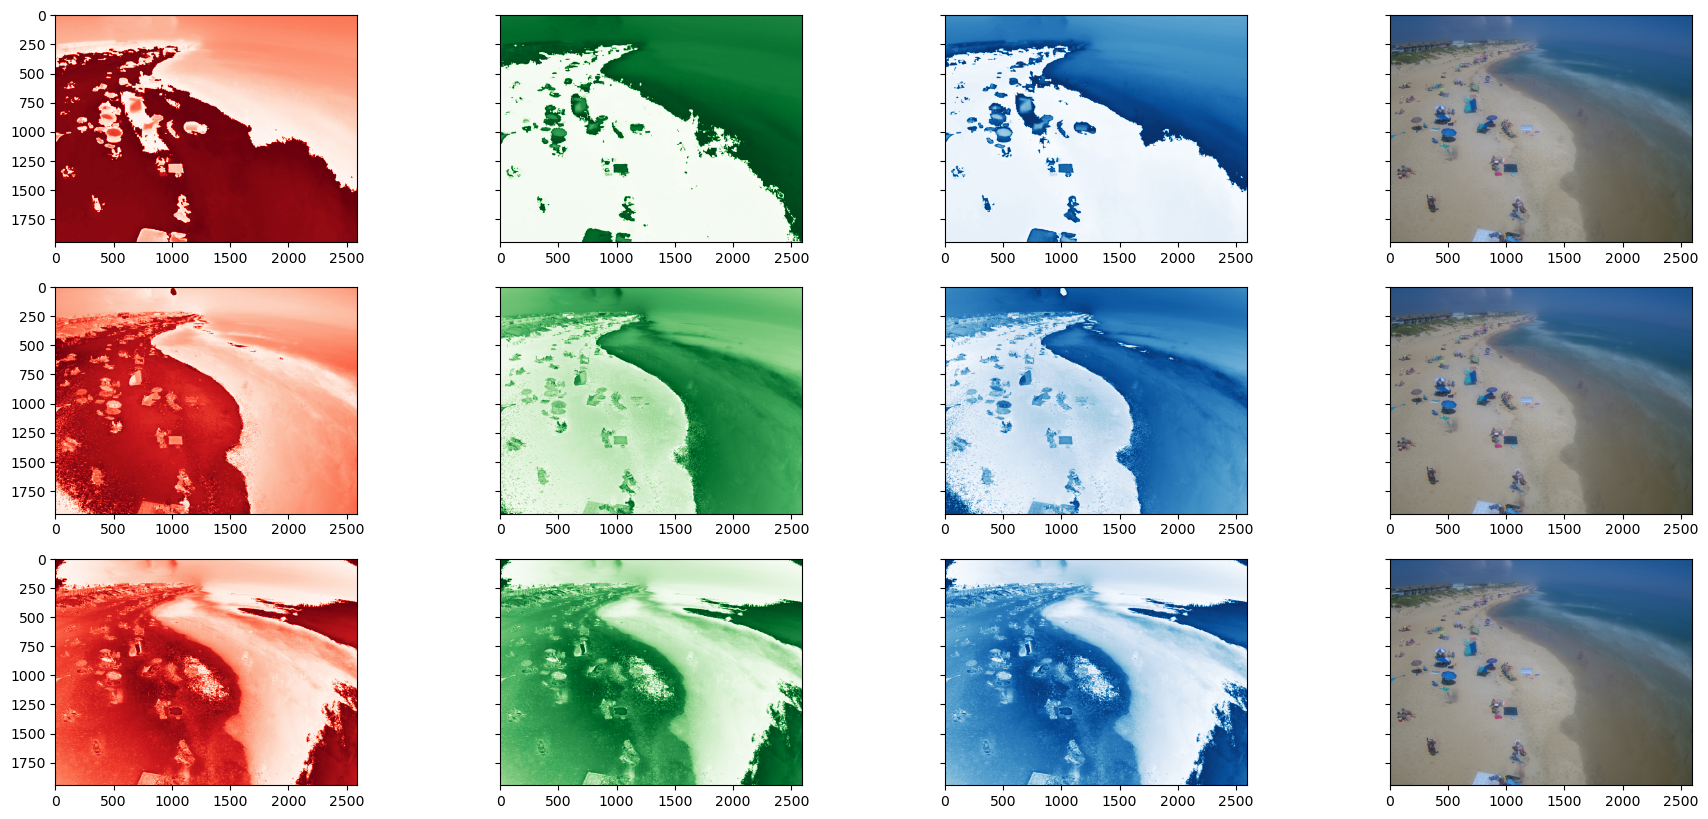

In [12]:
# Convert BGR to RGB for correct display
rgb_img = cv2.cvtColor(getImg.images[dt_range[6]], cv2.COLOR_BGR2RGB)
# rgb_img = getImg.images[dt_range[1]]
# plot the individual color channels of the image in their color space
fig, ax = plt.subplots(nrows=3, ncols=4, sharey=True,figsize=(22, 10))
ax[0,0].imshow(-(rgb_img[:,:,0]-rgb_img[:,:,2]), cmap='Reds')
ax[0,1].imshow(-(rgb_img[:,:,1]-rgb_img[:,:,0]), cmap='Greens')
ax[0,2].imshow(-(rgb_img[:,:,2]-rgb_img[:,:,0]), cmap='Blues')
ax[0,3].imshow(rgb_img)

ax[1,0].imshow(-(rgb_img[:,:,0]+rgb_img[:,:,2]), cmap='Reds') # sum of red and blue channels
ax[1,1].imshow(+(rgb_img[:,:,1]+rgb_img[:,:,0]), cmap='Greens')
ax[1,2].imshow(rgb_img[:,:,2]+rgb_img[:,:,0], cmap='Blues')
ax[1,3].imshow(rgb_img)

ax[2,0].imshow(rgb_img[:,:,1]+rgb_img[:,:,0]+rgb_img[:,:,2], cmap='Reds')
ax[2,1].imshow(rgb_img[:,:,1]+rgb_img[:,:,0]+rgb_img[:,:,2], cmap='Greens')
ax[2,2].imshow(rgb_img[:,:,1]+rgb_img[:,:,0]+rgb_img[:,:,2], cmap='Blues')
ax[2,3].imshow(rgb_img)

# set the green channel to zero
# rgb_img_no_green = rgb_img.copy()
# rgb_img_no_green[:,:,1] = 0
# ax[2,0].imshow(-(rgb_img_no_green[:,:,0]+rgb_img_no_green[:,:,2]), cmap='Reds')
# ax[2,1].imshow(+(rgb_img_no_green[:,:,1]+rgb_img_no_green[:,:,0]), cmap='Greens')
# ax[2,2].imshow(+(rgb_img_no_green[:,:,2]+rgb_img_no_green[:,:,0]), cmap='Blues')
# ax[2,3].imshow(rgb_img_no_green)

plt.show()

# Break
Return to this approach but on a more discrete scale. Treat discretized bins as neural cells. We can also cluster on the segmented regions to represent them in BGR space to find pure vegetation, sand, washout, ocean, and sky regions. 